<a href="https://colab.research.google.com/github/MaQuest/Summer2021/blob/main/Texts_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from google.colab import files
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import csv
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
uploaded = files.upload()


Saving CoC.csv to CoC (1).csv


In [ ]:
#  Reading the csv
df = pd.read_excel('CoC.csv')

#  Sorting the dataframe
df.sort_index(inplace=True)

# Identifying the texts with category = None (Nan) 
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print("Text with Negative datatype" + str(rows_with_NaN))


Accuracy of the dataset is 0.6165413533834586
F1 score of the dataset is 0.7627906976744185


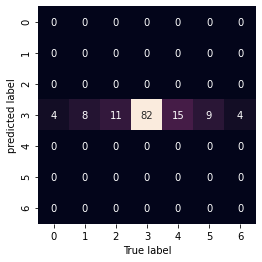

In [209]:
#  Removes the negative data types from the dataframe

df.dropna(subset = ["Category"], inplace=True)

#  Storing the textual data in X
X=df.Text

#  Storing the categorys as y
y=df.Category

#  Obtaining the training and test sets by using in built function called train_test_split with 80-20 test size 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

#  Creating the pipeline which does vectorization , removes stop words and then creates a multinomialNB

model_1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

#  Creating fit 

model_1.fit(X_train,y_train)

#  Predicting the datasets 
labels= model_1.predict(X_test)

#  Obtaining the accuracy 
print("Accuracy of the dataset is " + str(metrics.accuracy_score(y_test, labels)))
print("F1 score of the dataset is " + str(metrics.f1_score(y_test, labels, average='weighted', labels=np.unique(labels))))

#  Creating the confusion matrix for the items that weren't clearly identified 

mat = confusion_matrix(y_test,labels)

#  Creating a heatmap of the confusion matrix 

sns.heatmap(mat.T,square = True , annot = True , fmt = 'd',cbar = False
            )

plt.xlabel('True label')

plt.ylabel('predicted label') ;
